**Predict assessed property value for the purpose of property tax assessment**

Step 1 : Importing necessary libraries


In [1]:
import pandas as pd # pandas used for data manipulation on dataframe
import numpy as np # numpy used for mathematical operation on array
import seaborn as sn # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Step 2 : Load dataset

In [2]:
#loading the dataframe
df = pd.DataFrame(pd.read_csv("/content/Train-1665386529049.csv"))


Step 3 :Exploratory Data Analysis

In [3]:
df.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30-05-2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13-09-2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28-09-2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05-06-2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07-02-2015,640000


In [4]:
df.tail()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30-11-2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19-12-2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16-11-2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17-09-2014,550000
16809,PR27910,4,NY,HARLEM-UPPER,415 WEST 150 STREET,10031,2065,22,08 RENTALS - ELEVATOR APARTMENTS,16,1,17,4996,29529,2007,2,D7,22-03-2013,5000000


In [5]:
df.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [6]:
df.dtypes

PropertyID                    object
Borough                        int64
State                         object
Surroundings                  object
Address                       object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
TotalNoOfUnits                 int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
DateOfEvaluation              object
PropertyEvaluationvalue        int64
dtype: object

In [7]:
df.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PropertyID                  16810 non-null  object
 1   Borough                     16810 non-null  int64 
 2   State                       16810 non-null  object
 3   Surroundings                16810 non-null  object
 4   Address                     16810 non-null  object
 5   ZipCode                     16810 non-null  int64 
 6   Block                       16810 non-null  int64 
 7   Lot                         16810 non-null  int64 
 8   BldgClassCategory           16810 non-null  object
 9   NoOfResidentialUnits        16810 non-null  int64 
 10  NoOfCommercialUnits         16810 non-null  int64 
 11  TotalNoOfUnits              16810 non-null  int64 
 12  LandAreaInSqFt              16810 non-null  int64 
 13  GrossAreaInSqFt             16810 non-null  in

In [9]:
len(df)

16810

In [10]:
df.isnull()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16806,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16807,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.dropna()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30-05-2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13-09-2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28-09-2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05-06-2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07-02-2015,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30-11-2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19-12-2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16-11-2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17-09-2014,550000


In [12]:
len(df)

16810

In [13]:
df.nunique()

PropertyID                    16810
Borough                           5
State                             1
Surroundings                    243
Address                       15219
ZipCode                         174
Block                          6405
Lot                            1299
BldgClassCategory                52
NoOfResidentialUnits             70
NoOfCommercialUnits              18
TotalNoOfUnits                   75
LandAreaInSqFt                 3898
GrossAreaInSqFt                3350
YearOfConstruction               72
TaxClass_AtEvaluationTime         3
BldgClass_AtEvaluationTime      101
DateOfEvaluation                572
PropertyEvaluationvalue        3694
dtype: int64

Step 4 :Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


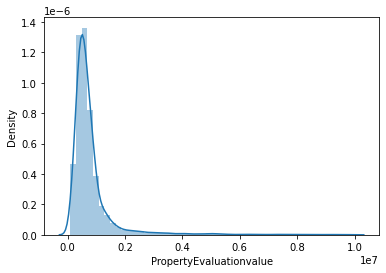

In [14]:
sn.distplot(df.PropertyEvaluationvalue)

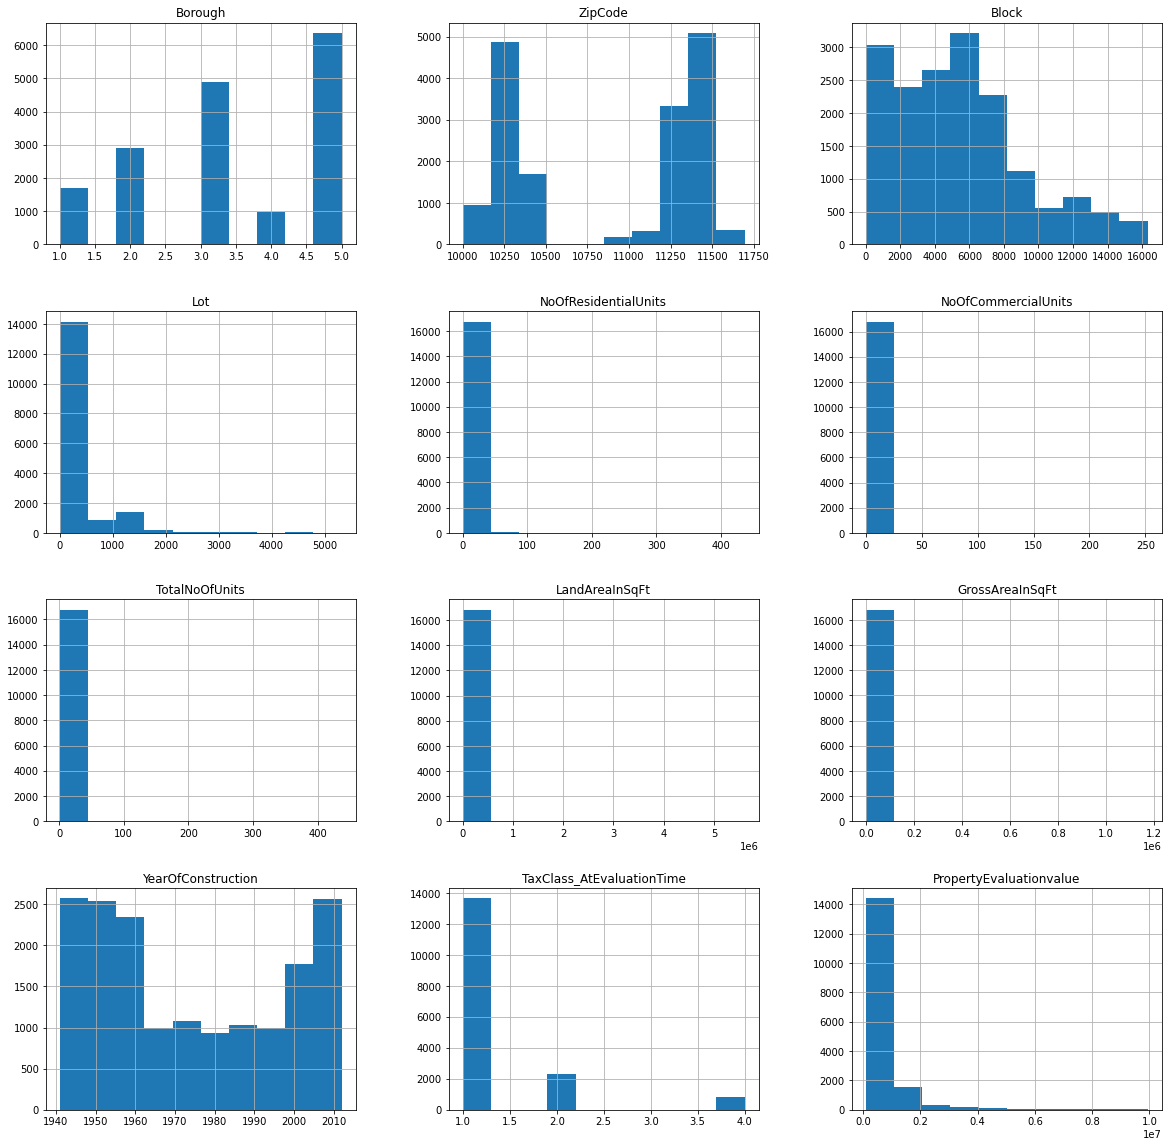

In [15]:
df.hist(figsize=(20,20))
plt.show()

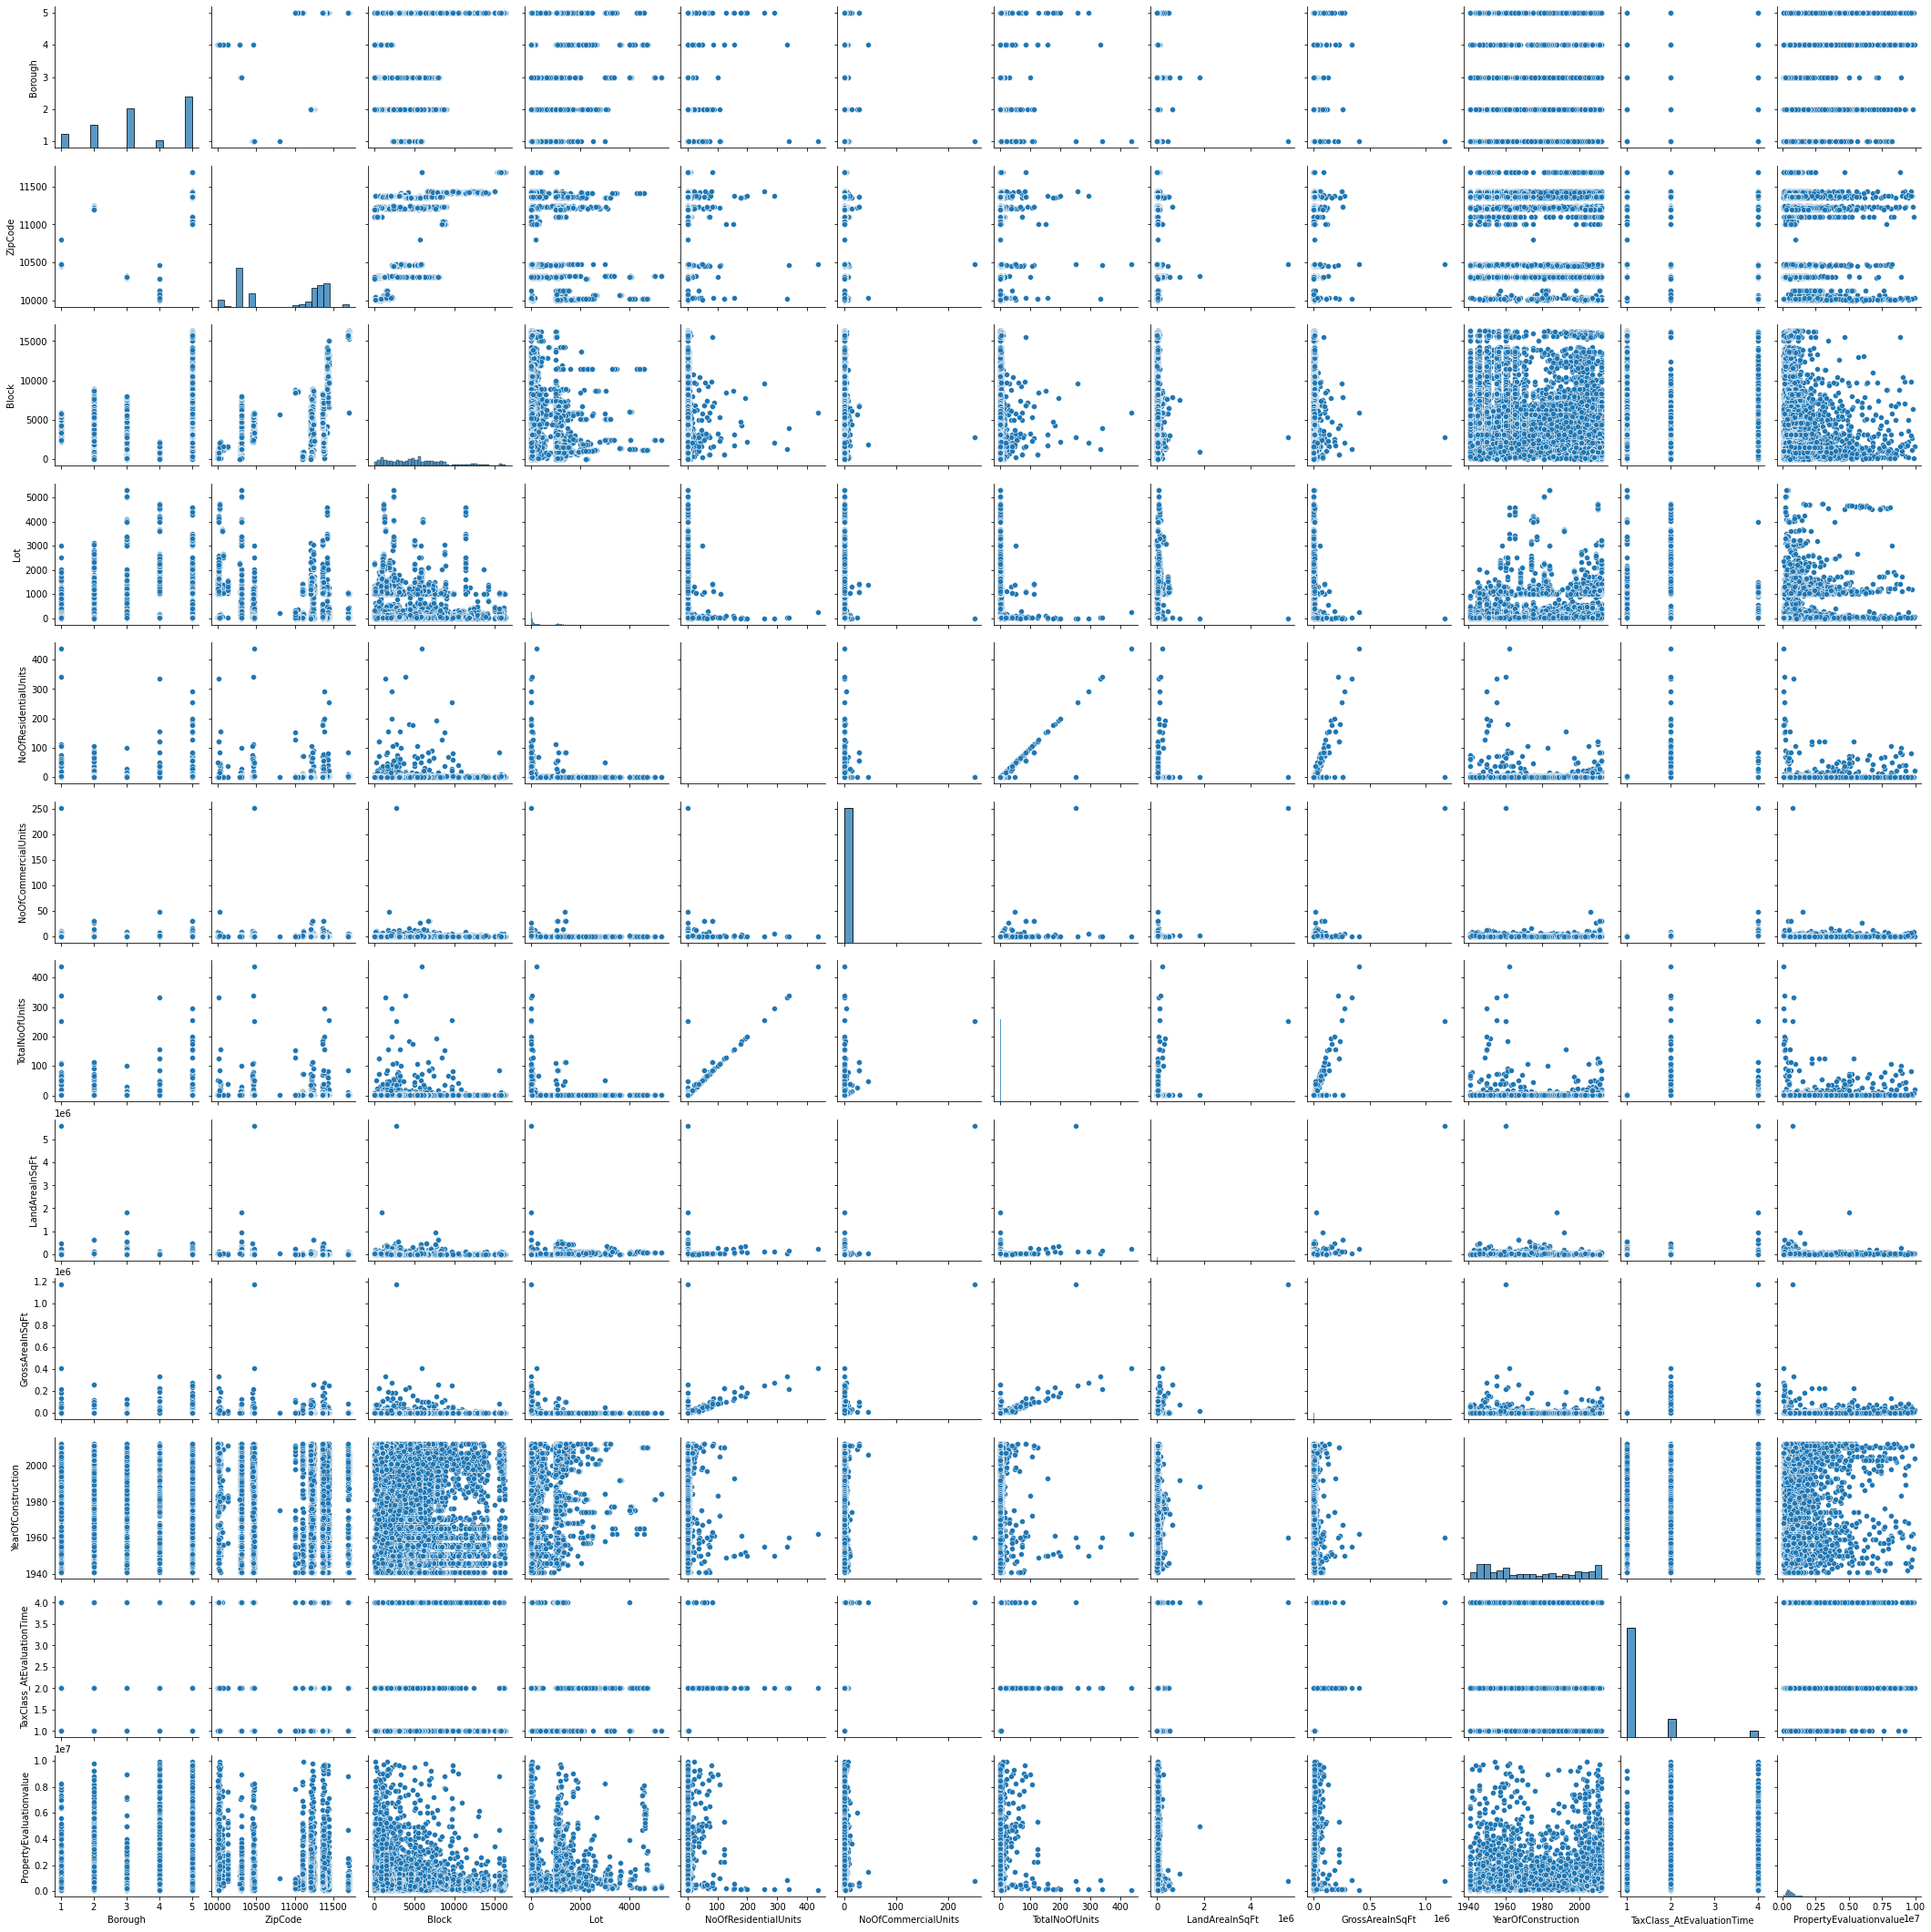

In [16]:
sn.pairplot(df)

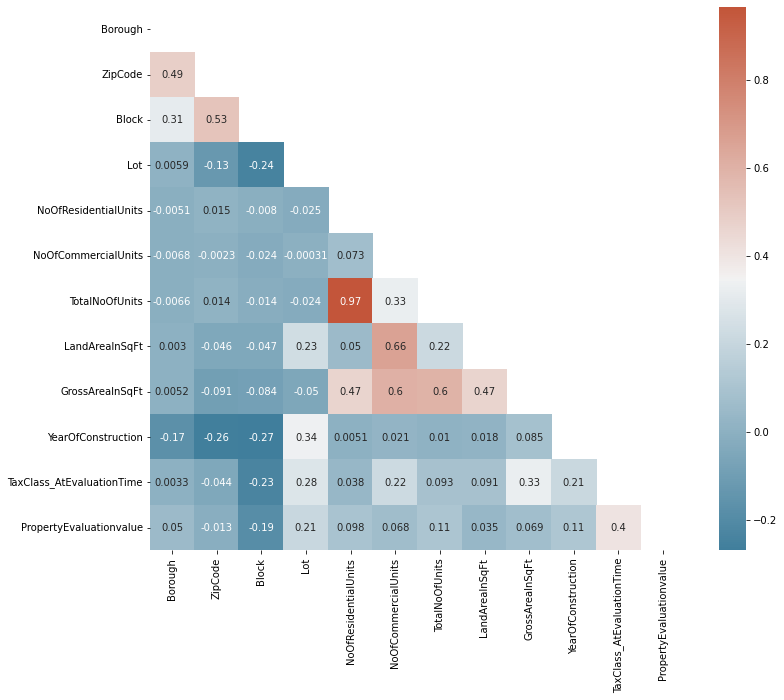

In [17]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [18]:
df=pd.get_dummies(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Columns: 33010 entries, Borough to DateOfEvaluation_31-12-2014
dtypes: int64(12), uint8(32998)
memory usage: 530.5 MB


In [21]:
df=pd.get_dummies(df)

In [22]:
df.shape

(16810, 33010)

In [23]:
df

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,...,DateOfEvaluation_31-05-2013,DateOfEvaluation_31-05-2014,DateOfEvaluation_31-07-2013,DateOfEvaluation_31-07-2014,DateOfEvaluation_31-08-2012,DateOfEvaluation_31-08-2014,DateOfEvaluation_31-10-2012,DateOfEvaluation_31-10-2014,DateOfEvaluation_31-12-2012,DateOfEvaluation_31-12-2014
0,1,10456,2927,127,2,0,2,1900,2394,1990,...,0,0,0,0,0,0,0,0,0,0
1,1,10457,3037,110,3,0,3,1687,3037,2002,...,0,0,0,0,0,0,0,0,0,0
2,1,10457,2912,155,2,0,2,2000,2400,1989,...,0,0,0,0,0,0,0,0,0,0
3,1,10457,2929,134,2,0,2,2356,2394,1991,...,0,0,0,0,0,0,0,0,0,0
4,1,10457,3036,140,2,0,2,3346,2308,1993,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,4,10007,123,1213,1,0,1,29715,2803,2004,...,0,0,0,0,0,0,0,0,0,0
16806,4,10013,176,1054,1,0,1,12518,2252,2003,...,0,0,0,0,0,0,0,0,0,0
16807,4,10013,176,1102,1,0,1,12518,2177,2003,...,0,0,0,0,0,0,0,0,0,0
16808,4,10280,16,2249,1,0,1,12644,594,1981,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y=df["PropertyEvaluationvalue"]
X=df.drop(['PropertyEvaluationvalue'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13448, 33009)
(3362, 33009)
(13448,)
(3362,)


In [26]:
RF=RandomForestRegressor()

In [27]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
training_data_prediction = RF.predict(X_train)

In [29]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared  : ", error_score)

R squared  :  0.9590850879139242


In [30]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared  : ", error_score)

R squared  :  0.9590850879139242


In [35]:
#create DataFrame
df1 = pd.DataFrame( columns=['PropertyID','PropertyEvaluationvalue'])

In [36]:
print("Original DataFrame:")
print(df1)
print('Data from datav.csv:')
 
df.to_csv('datav.csv', sep='\t', index=False,header=True)
new_df = pd.read_csv('datav.csv')
 
print(new_df)

Original DataFrame:
       Borough  ZipCode  Block   Lot  NoOfResidentialUnits  \
0            1    10456   2927   127                     2   
1            1    10457   3037   110                     3   
2            1    10457   2912   155                     2   
3            1    10457   2929   134                     2   
4            1    10457   3036   140                     2   
...        ...      ...    ...   ...                   ...   
16805        4    10007    123  1213                     1   
16806        4    10013    176  1054                     1   
16807        4    10013    176  1102                     1   
16808        4    10280     16  2249                     1   
16809        4    10031   2065    22                    16   

       NoOfCommercialUnits  TotalNoOfUnits  LandAreaInSqFt  GrossAreaInSqFt  \
0                        0               2            1900             2394   
1                        0               3            1687             3037  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df.to_csv('data.csv')